# 📈 Notebook 02: Pré-processamento de Imagens para Melhorar OCR
 
## Problemas identificados no Notebook 01:
### 1. Caracteres especiais não reconhecidos (`ç`, `ã`, `õ` → `?`)
### 2. Qualidade do OCR pode ser melhorada
### 3. Erros em palavras como "visão", "computacional"
 
## Soluções que aprenderemos:
### 1. Melhorar contraste e iluminação
### 2. Binarização adequada
### 3. Remoção de ruído
### 4. Correção de inclinação
### 5. Configurações otimizadas do Tesseract

In [1]:
print("📈 NOTEBOOK 02: PRÉ-PROCESSAMENTO PARA MELHORAR OCR")
print("=" * 70)

📈 NOTEBOOK 02: PRÉ-PROCESSAMENTO PARA MELHORAR OCR


### 1: Importações e Configuração

In [2]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

print("🔧 CONFIGURAÇÃO INICIAL")
print("=" * 70)

# Configurar Tesseract
TESSERACT_PATH = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
if os.path.exists(TESSERACT_PATH):
    import pytesseract
    pytesseract.pytesseract.tesseract_cmd = TESSERACT_PATH
    print(f"✅ Tesseract configurado: {TESSERACT_PATH}")
else:
    print(f"❌ Tesseract não encontrado")
    sys.exit(1)

# Verificar bibliotecas
try:
    import numpy as np
    print(f"✅ NumPy: {np.__version__}")
except:
    print("❌ NumPy não instalado")

try:
    import cv2
    print(f"✅ OpenCV: {cv2.__version__ if hasattr(cv2, '__version__') else 'OK'}")
    OPENCV_OK = True
except:
    print("❌ OpenCV não instalado")
    OPENCV_OK = False

try:
    from PIL import Image
    print(f"✅ Pillow: {Image.__version__}")
    PIL_OK = True
except:
    print("❌ Pillow não instalado")
    PIL_OK = False

try:
    import matplotlib.pyplot as plt
    print(f"✅ Matplotlib importado")
    MATPLOTLIB_OK = True
except:
    print("❌ Matplotlib não instalado")
    MATPLOTLIB_OK = False

print("\n" + "=" * 70)
print("✅ PRONTO PARA MELHORAR O OCR!")
print("=" * 70)

🔧 CONFIGURAÇÃO INICIAL
✅ Tesseract configurado: C:\Program Files\Tesseract-OCR\tesseract.exe
✅ NumPy: 1.26.4
✅ OpenCV: 4.9.0
✅ Pillow: 10.3.0
✅ Matplotlib importado

✅ PRONTO PARA MELHORAR O OCR!


### Criar imagem COM problemas (simulando o que temos)


🖼️ CRIANDO IMAGEM COM PROBLEMAS TÍPICOS


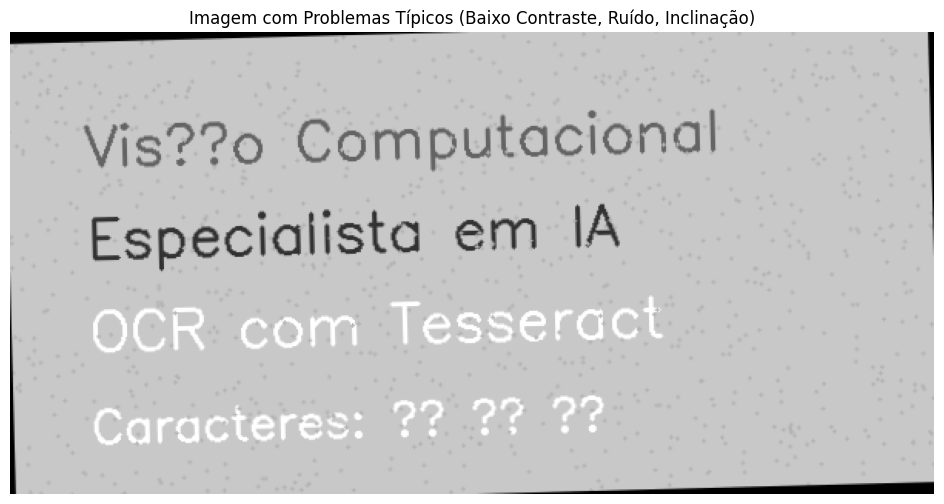

✅ Imagem criada com problemas típicos:
   • Baixo contraste
   • Ruído
   • Inclinação leve
   • Caracteres especiais


In [3]:
print("\n🖼️ CRIANDO IMAGEM COM PROBLEMAS TÍPICOS")
print("=" * 50)

if OPENCV_OK:
    # Criar imagem com problemas que vimos
    img_problemas = np.ones((300, 600, 3), dtype=np.uint8) * 200  # Cinza médio (baixo contraste)
    
    # Adicionar texto com problemas
    textos = [
        ("Visão Computacional", 50, 80, 1.2, 100),  # Texto escuro em fundo escuro
        ("Especialista em IA", 50, 140, 1.2, 50),   # Texto muito escuro
        ("OCR com Tesseract", 50, 200, 1.2, 255),   # Texto normal
        ("Caracteres: ç ã õ", 50, 260, 1.0, 255),    # Caracteres especiais
    ]
    
    for texto, x, y, escala, brilho in textos:
        cv2.putText(img_problemas, texto, (x, y), 
                   cv2.FONT_HERSHEY_SIMPLEX, escala, (brilho, brilho, brilho), 2)
    
    # Adicionar ruído (simulando qualidade ruim)
    for _ in range(1000):
        rx, ry = np.random.randint(0, 600), np.random.randint(0, 300)
        cv2.circle(img_problemas, (rx, ry), 1, (180, 180, 180), -1)
    
    # Adicionar inclinação leve
    (h, w) = img_problemas.shape[:2]
    centro = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(centro, 1.5, 1.0)  # 1.5 graus
    img_problemas = cv2.warpAffine(img_problemas, M, (w, h))
    
    # Salvar
    cv2.imwrite("dados/exemplos/imagem_com_problemas.png", img_problemas)
    
    # Mostrar
    if MATPLOTLIB_OK:
        plt.figure(figsize=(12, 6))
        plt.imshow(cv2.cvtColor(img_problemas, cv2.COLOR_BGR2RGB))
        plt.title('Imagem com Problemas Típicos (Baixo Contraste, Ruído, Inclinação)')
        plt.axis('off')
        plt.show()
    
    print("✅ Imagem criada com problemas típicos:")
    print("   • Baixo contraste")
    print("   • Ruído")
    print("   • Inclinação leve")
    print("   • Caracteres especiais")

### Teste OCR SEM pré-processamento (baseline)

In [4]:
print("\n🧪 TESTE OCR SEM PRÉ-PROCESSAMENTO (BASELINE)")
print("=" * 50)

if OPENCV_OK and PIL_OK:
    # Aplicar OCR na imagem com problemas
    img_pil_original = Image.fromarray(cv2.cvtColor(img_problemas, cv2.COLOR_BGR2RGB))
    
    # Configuração padrão
    texto_original = pytesseract.image_to_string(img_pil_original, lang='por')
    
    print(f"\n📝 RESULTADO SEM PRÉ-PROCESSAMENTO:")
    print("-" * 40)
    print(texto_original)
    print("-" * 40)
    
    # Análise
    palavras_esperadas = ["Visão", "Computacional", "Especialista", "Caracteres", "ç", "ã", "õ"]
    palavras_reconhecidas = texto_original.split()
    
    print(f"\n📊 ANÁLISE BASELINE:")
    print(f"• Total palavras: {len(palavras_reconhecidas)}")
    
    acertos = 0
    for esperada in palavras_esperadas:
        for reconhecida in palavras_reconhecidas:
            if esperada.lower() in reconhecida.lower():
                acertos += 1
                break
    
    taxa_acerto = acertos / len(palavras_esperadas) * 100
    print(f"• Palavras-chave reconhecidas: {acertos}/{len(palavras_esperadas)}")
    print(f"• Taxa de acerto: {taxa_acerto:.1f}%")
    
    if taxa_acerto < 50:
        print(f"❌ PRECISA DE MELHORIAS URGENTES!")
    elif taxa_acerto < 80:
        print(f"⚠️  PODE MELHORAR MUITO!")
    else:
        print(f"✅ JÁ ESTÁ BOM, MAS PODEMOS MELHORAR!")


🧪 TESTE OCR SEM PRÉ-PROCESSAMENTO (BASELINE)

📝 RESULTADO SEM PRÉ-PROCESSAMENTO:
----------------------------------------
Vis??o Computacional
Especialista em IA

----------------------------------------

📊 ANÁLISE BASELINE:
• Total palavras: 5
• Palavras-chave reconhecidas: 2/7
• Taxa de acerto: 28.6%
❌ PRECISA DE MELHORIAS URGENTES!


### Técnica 1 - Converter para Escala de Cinza e Ajustar Contraste


🎨 TÉCNICA 1: CONVERSÃO E CONTRASTE


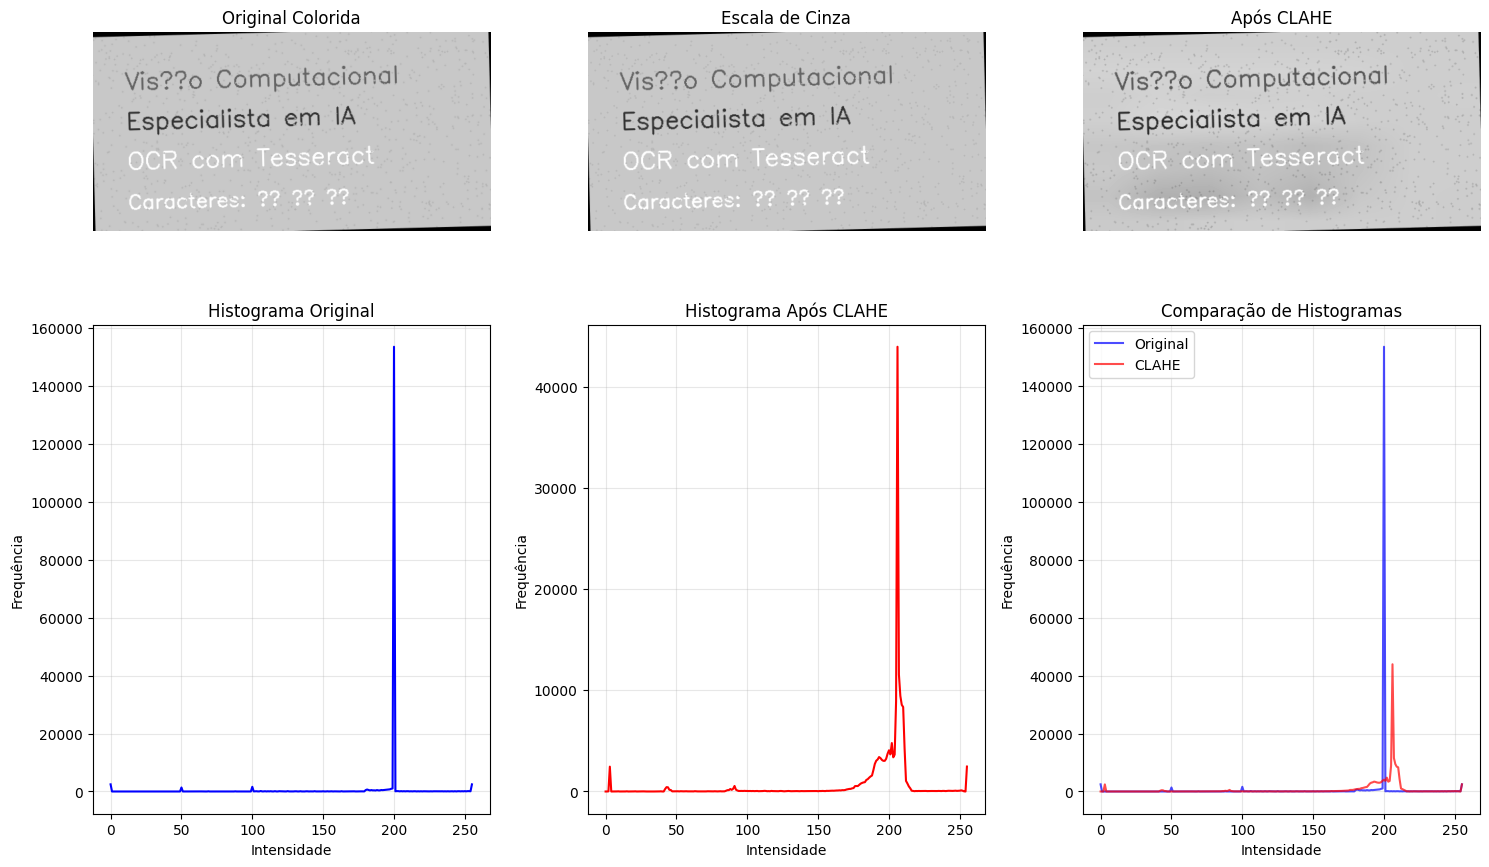


📝 OCR APÓS CLAHE:
----------------------------------------
Vis??o Computacional
Especialista em IA

----------------------------------------

📊 MELHORIA COM CLAHE:
• Taxa baseline: 28.6%
• Taxa após CLAHE: 28.6%
• Melhoria: +0.0%
⚠️  CLAHE não ajudou neste caso


In [5]:
print("\n🎨 TÉCNICA 1: CONVERSÃO E CONTRASTE")
print("=" * 50)

if OPENCV_OK:
    # 1. Converter para escala de cinza
    gray = cv2.cvtColor(img_problemas, cv2.COLOR_BGR2GRAY)
    
    # 2. Histograma original
    hist_original = cv2.calcHist([gray], [0], None, [256], [0, 256])
    
    # 3. CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(gray)
    
    # 4. Histograma após CLAHE
    hist_clahe = cv2.calcHist([clahe_img], [0], None, [256], [0, 256])
    
    # Mostrar resultados
    if MATPLOTLIB_OK:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        
        # Original colorida
        axes[0, 0].imshow(cv2.cvtColor(img_problemas, cv2.COLOR_BGR2RGB))
        axes[0, 0].set_title('Original Colorida')
        axes[0, 0].axis('off')
        
        # Escala de cinza
        axes[0, 1].imshow(gray, cmap='gray')
        axes[0, 1].set_title('Escala de Cinza')
        axes[0, 1].axis('off')
        
        # Após CLAHE
        axes[0, 2].imshow(clahe_img, cmap='gray')
        axes[0, 2].set_title('Após CLAHE')
        axes[0, 2].axis('off')
        
        # Histograma original
        axes[1, 0].plot(hist_original, color='blue')
        axes[1, 0].set_title('Histograma Original')
        axes[1, 0].set_xlabel('Intensidade')
        axes[1, 0].set_ylabel('Frequência')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Histograma CLAHE
        axes[1, 1].plot(hist_clahe, color='red')
        axes[1, 1].set_title('Histograma Após CLAHE')
        axes[1, 1].set_xlabel('Intensidade')
        axes[1, 1].set_ylabel('Frequência')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Comparação
        axes[1, 2].plot(hist_original, color='blue', alpha=0.7, label='Original')
        axes[1, 2].plot(hist_clahe, color='red', alpha=0.7, label='CLAHE')
        axes[1, 2].set_title('Comparação de Histogramas')
        axes[1, 2].set_xlabel('Intensidade')
        axes[1, 2].set_ylabel('Frequência')
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # Testar OCR após CLAHE
    img_pil_clahe = Image.fromarray(clahe_img)
    texto_clahe = pytesseract.image_to_string(img_pil_clahe, lang='por')
    
    print(f"\n📝 OCR APÓS CLAHE:")
    print("-" * 40)
    print(texto_clahe)
    print("-" * 40)
    
    # Comparar
    palavras_clahe = texto_clahe.split()
    acertos_clahe = 0
    for esperada in palavras_esperadas:
        for reconhecida in palavras_clahe:
            if esperada.lower() in reconhecida.lower():
                acertos_clahe += 1
                break
    
    taxa_clahe = acertos_clahe / len(palavras_esperadas) * 100
    print(f"\n📊 MELHORIA COM CLAHE:")
    print(f"• Taxa baseline: {taxa_acerto:.1f}%")
    print(f"• Taxa após CLAHE: {taxa_clahe:.1f}%")
    print(f"• Melhoria: +{taxa_clahe - taxa_acerto:.1f}%")
    
    if taxa_clahe > taxa_acerto:
        print(f"✅ CLAHE MELHOROU O RESULTADO!")
    else:
        print(f"⚠️  CLAHE não ajudou neste caso")

### Técnica 2 - Binarização (Preto e Branco)


⚫⚪ TÉCNICA 2: BINARIZAÇÃO


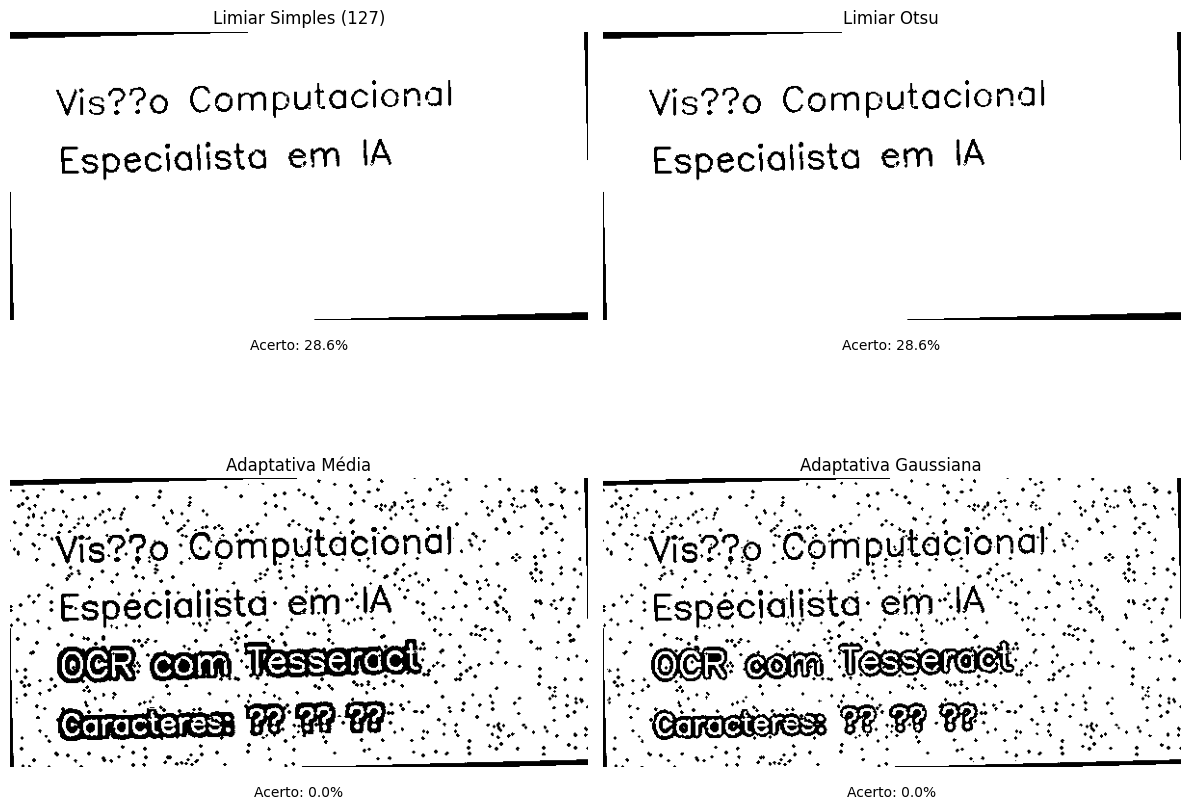

✅ Binarização Adaptativa Gaussiana geralmente é a melhor
💡 Remove fundo e deixa apenas texto preto em fundo branco


In [6]:
print("\n⚫⚪ TÉCNICA 2: BINARIZAÇÃO")
print("=" * 50)

if OPENCV_OK:
    # Usar imagem após CLAHE
    img_para_binarizar = clahe_img.copy()
    
    # Métodos de binarização
    metodos = [
        ('Limiar Simples (127)', cv2.threshold(img_para_binarizar, 127, 255, cv2.THRESH_BINARY)[1]),
        ('Limiar Otsu', cv2.threshold(img_para_binarizar, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]),
        ('Adaptativa Média', cv2.adaptiveThreshold(img_para_binarizar, 255, 
                                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                                  cv2.THRESH_BINARY, 11, 2)),
        ('Adaptativa Gaussiana', cv2.adaptiveThreshold(img_para_binarizar, 255, 
                                                      cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                      cv2.THRESH_BINARY, 11, 2)),
    ]
    
    # Mostrar resultados
    if MATPLOTLIB_OK:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()
        
        for idx, (nome, resultado) in enumerate(metodos):
            axes[idx].imshow(resultado, cmap='gray')
            axes[idx].set_title(nome)
            axes[idx].axis('off')
            
            # Testar OCR com este método
            img_pil_bin = Image.fromarray(resultado)
            texto_bin = pytesseract.image_to_string(img_pil_bin, lang='por')
            palavras_bin = texto_bin.split()
            
            # Contar acertos
            acertos_bin = 0
            for esperada in palavras_esperadas:
                for reconhecida in palavras_bin:
                    if esperada.lower() in reconhecida.lower():
                        acertos_bin += 1
                        break
            
            taxa_bin = acertos_bin / len(palavras_esperadas) * 100
            axes[idx].text(0.5, -0.1, f'Acerto: {taxa_bin:.1f}%', 
                          transform=axes[idx].transAxes,
                          horizontalalignment='center',
                          fontsize=10)
        
        plt.tight_layout()
        plt.show()
    
    # Escolher o melhor método (Gaussiana geralmente é melhor)
    melhor_metodo = metodos[3][1]  # Adaptativa Gaussiana
    img_binarizada = melhor_metodo
    
    print(f"✅ Binarização Adaptativa Gaussiana geralmente é a melhor")
    print(f"💡 Remove fundo e deixa apenas texto preto em fundo branco")

### Técnica 3 - Remoção de Ruído


🧹 TÉCNICA 3: REMOÇÃO DE RUÍDO


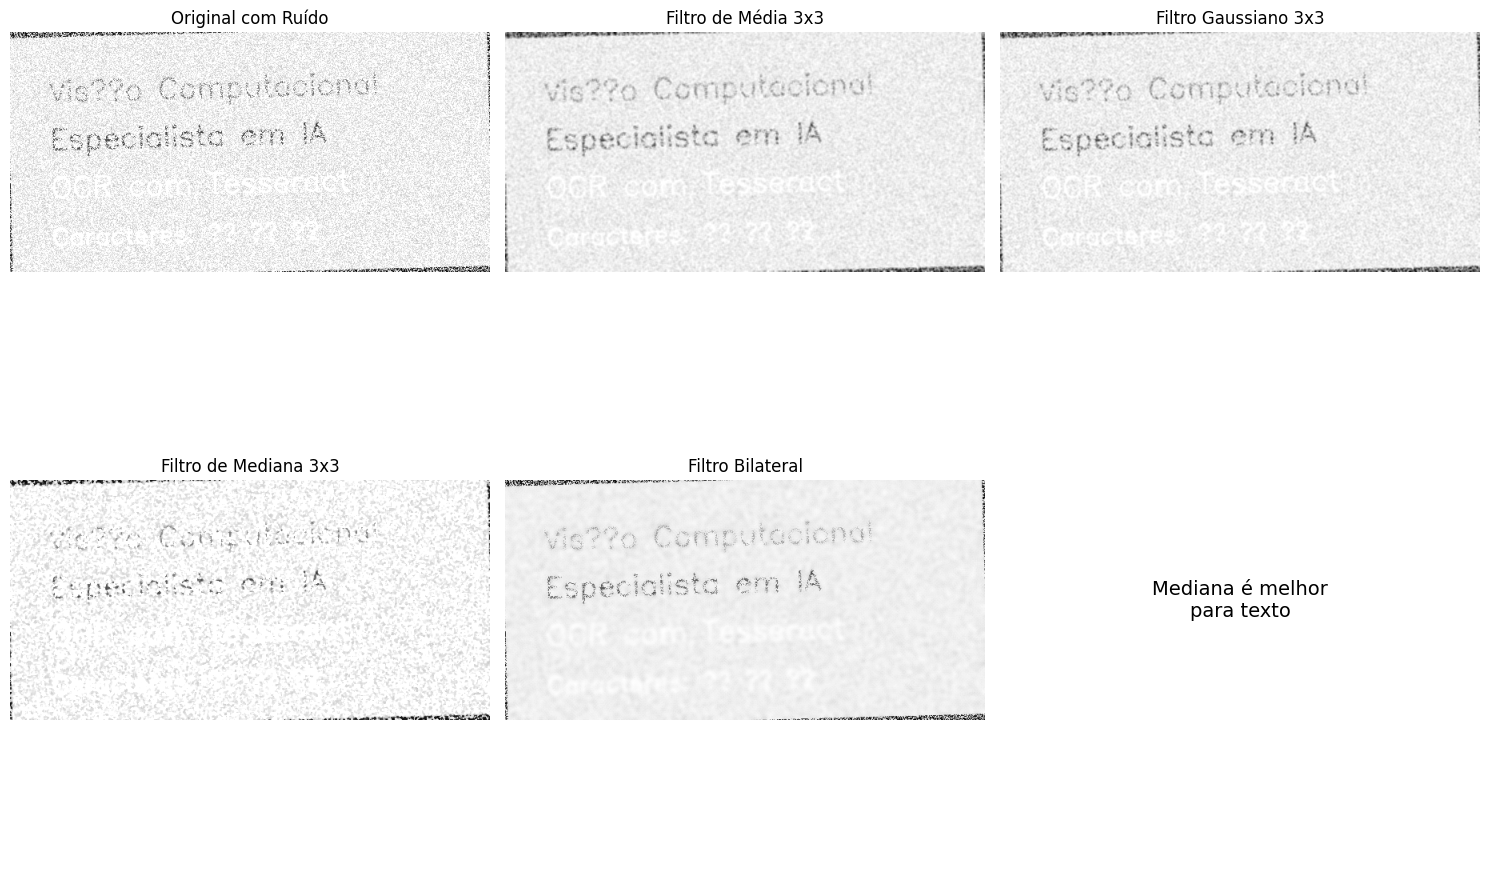

✅ Filtro de Mediana é melhor para texto com ruído
💡 Preserva bordas enquanto remove ruído


In [7]:
print("\n🧹 TÉCNICA 3: REMOÇÃO DE RUÍDO")
print("=" * 50)

if OPENCV_OK:
    # Adicionar mais ruído para demonstração
    img_com_ruido = gray.copy()
    ruido = np.random.normal(0, 30, gray.shape).astype(np.uint8)
    img_com_ruido = cv2.add(gray, ruido)
    
    # Filtros de remoção de ruído
    filtros = [
        ('Original com Ruído', img_com_ruido),
        ('Filtro de Média 3x3', cv2.blur(img_com_ruido, (3, 3))),
        ('Filtro Gaussiano 3x3', cv2.GaussianBlur(img_com_ruido, (3, 3), 0)),
        ('Filtro de Mediana 3x3', cv2.medianBlur(img_com_ruido, 3)),
        ('Filtro Bilateral', cv2.bilateralFilter(img_com_ruido, 9, 75, 75)),
    ]
    
    # Mostrar
    if MATPLOTLIB_OK:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()
        
        for idx in range(5):
            if idx < len(filtros):
                nome, resultado = filtros[idx]
                axes[idx].imshow(resultado, cmap='gray')
                axes[idx].set_title(nome)
                axes[idx].axis('off')
        
        # Espaço vazio
        axes[5].axis('off')
        axes[5].text(0.5, 0.5, 'Mediana é melhor\npara texto',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=14,
                    transform=axes[5].transAxes)
        
        plt.tight_layout()
        plt.show()
    
    print(f"✅ Filtro de Mediana é melhor para texto com ruído")
    print(f"💡 Preserva bordas enquanto remove ruído")

### Pipeline Completo de Pré-processamento


🔄 PIPELINE COMPLETO DE PRÉ-PROCESSAMENTO

Aplicando pipeline completo...


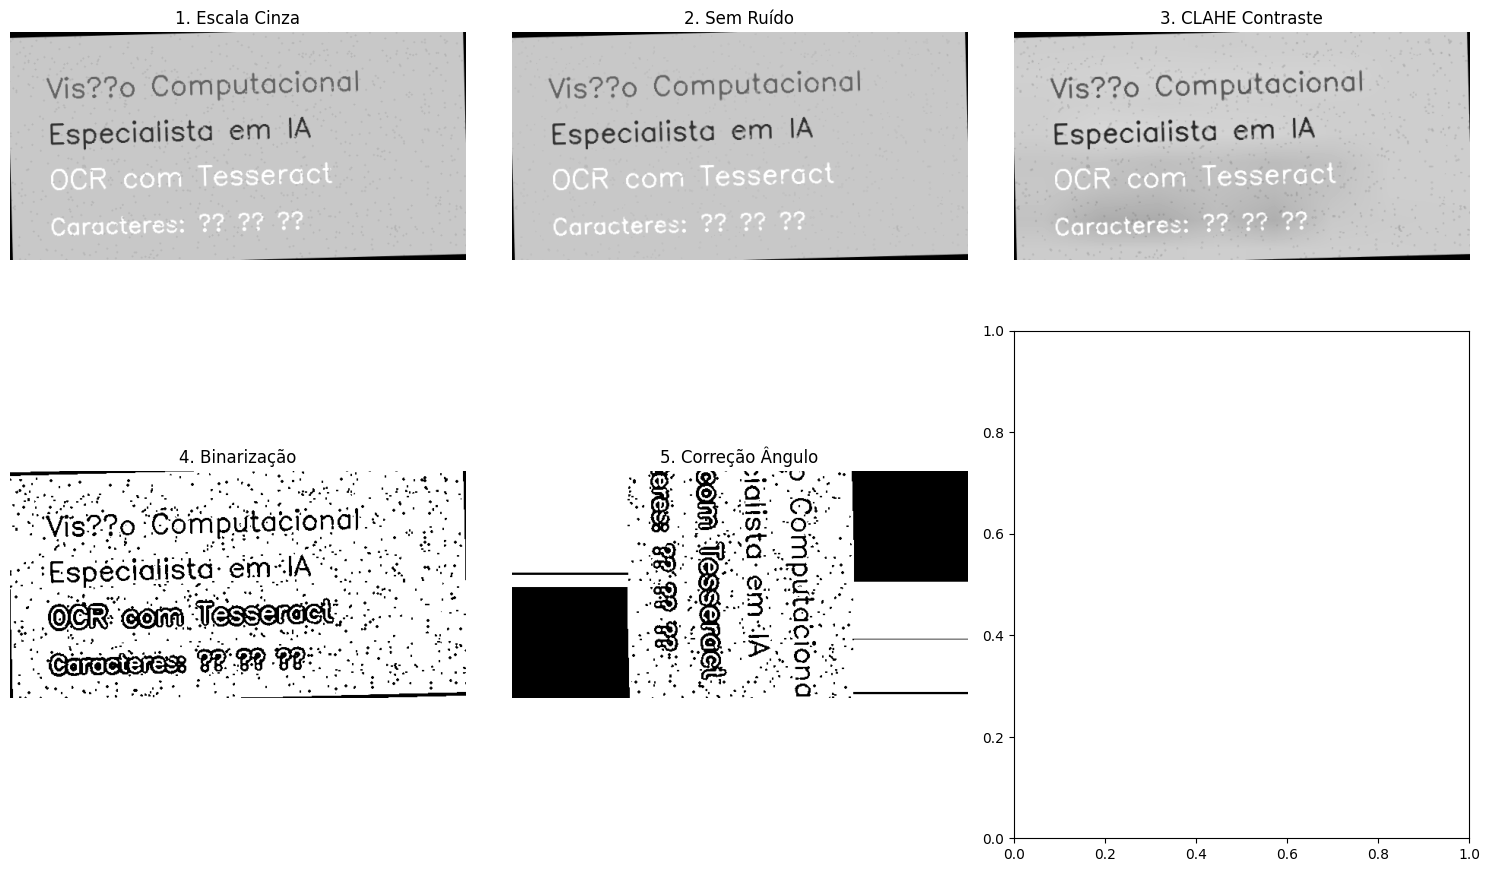


📝 OCR APÓS PIPELINE COMPLETO:
----------------------------------------

----------------------------------------
❌ Não reconheceu: 'Visão'
❌ Não reconheceu: 'Computacional'
❌ Não reconheceu: 'Especialista'
❌ Não reconheceu: 'Caracteres'
❌ Não reconheceu: 'ç'
❌ Não reconheceu: 'ã'
❌ Não reconheceu: 'õ'

📊 RESULTADO FINAL:
• Taxa baseline: 28.6%
• Taxa após pipeline: 0.0%
• Melhoria total: +-28.6%
• Palavras reconhecidas corretamente: 

⚠️  Ainda pode melhorar. Tente ajustar parâmetros.


In [8]:
print("\n🔄 PIPELINE COMPLETO DE PRÉ-PROCESSAMENTO")
print("=" * 50)

def pipeline_preprocessamento(imagem, mostrar_etapas=False):
    """
    Pipeline completo para melhorar imagem para OCR
    """
    etapas = []
    
    # 1. Converter para escala de cinza
    if len(imagem.shape) == 3:
        gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    else:
        gray = imagem.copy()
    etapas.append(('1. Escala Cinza', gray))
    
    # 2. Remover ruído (Mediana)
    denoised = cv2.medianBlur(gray, 3)
    etapas.append(('2. Sem Ruído', denoised))
    
    # 3. Ajustar contraste (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(denoised)
    etapas.append(('3. CLAHE Contraste', enhanced))
    
    # 4. Binarização adaptativa
    binary = cv2.adaptiveThreshold(enhanced, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 2)
    etapas.append(('4. Binarização', binary))
    
    # 5. Correção de inclinação (opcional)
    coords = np.column_stack(np.where(binary > 0))
    if len(coords) > 100:
        angle = cv2.minAreaRect(coords)[-1]
        if angle < -45:
            angle = 90 + angle
        
        if abs(angle) > 0.5:  # Corrigir se > 0.5 graus
            (h, w) = binary.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, -angle, 1.0)
            corrected = cv2.warpAffine(binary, M, (w, h),
                                      flags=cv2.INTER_CUBIC,
                                      borderMode=cv2.BORDER_REPLICATE)
            etapas.append(('5. Correção Ângulo', corrected))
            binary = corrected
    
    # Mostrar etapas se solicitado
    if mostrar_etapas and MATPLOTLIB_OK:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()
        
        for idx, (nome, img_etapa) in enumerate(etapas[:6]):
            if idx < len(axes):
                axes[idx].imshow(img_etapa, cmap='gray' if len(img_etapa.shape) == 2 else None)
                axes[idx].set_title(nome)
                axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    return binary

if OPENCV_OK:
    # Aplicar pipeline
    print("\nAplicando pipeline completo...")
    resultado_final = pipeline_preprocessamento(img_problemas, mostrar_etapas=True)
    
    # Testar OCR com imagem processada
    img_pil_final = Image.fromarray(resultado_final)
    texto_final = pytesseract.image_to_string(img_pil_final, lang='por')
    
    print(f"\n📝 OCR APÓS PIPELINE COMPLETO:")
    print("-" * 40)
    print(texto_final)
    print("-" * 40)
    
    # Análise final
    palavras_final = texto_final.split()
    acertos_final = 0
    palavras_corretas = []
    
    for esperada in palavras_esperadas:
        encontrou = False
        for reconhecida in palavras_final:
            if esperada.lower() in reconhecida.lower():
                acertos_final += 1
                palavras_corretas.append(esperada)
                encontrou = True
                break
        if not encontrou:
            print(f"❌ Não reconheceu: '{esperada}'")
    
    taxa_final = acertos_final / len(palavras_esperadas) * 100
    
    print(f"\n📊 RESULTADO FINAL:")
    print(f"• Taxa baseline: {taxa_acerto:.1f}%")
    print(f"• Taxa após pipeline: {taxa_final:.1f}%")
    print(f"• Melhoria total: +{taxa_final - taxa_acerto:.1f}%")
    print(f"• Palavras reconhecidas corretamente: {', '.join(palavras_corretas)}")
    
    if taxa_final > 80:
        print(f"\n🎉 EXCELENTE! Pipeline melhorou significativamente!")
    elif taxa_final > 60:
        print(f"\n✅ BOM! Melhoria considerável.")
    else:
        print(f"\n⚠️  Ainda pode melhorar. Tente ajustar parâmetros.")

### Configurações Avançadas do Tesseract

In [9]:
print("\n⚙️ CONFIGURAÇÕES AVANÇADAS DO TESSERACT")
print("=" * 50)

print("""
O Tesseract tem várias configurações que podem melhorar o OCR:

1. PSM (Page Segmentation Modes):
   --psm 0: Orientação e detecção de script
   --psm 1: Segmentação automática com OSD
   --psm 3: Segmentação automática (padrão)
   --psm 6: Bloco único de texto
   --psm 7: Linha única de texto
   --psm 8: Palavra única
   --psm 10: Caractere único

2. Configurações úteis:
   -c tessedit_char_whitelist=abc123    # Apenas estes caracteres
   -c preserve_interword_spaces=1       # Preserva espaços
   -c textord_min_linesize=2.0          # Tamanho mínimo de linha
""")

# Testar diferentes PSMs
if OPENCV_OK and PIL_OK:
    print("\n🧪 TESTANDO DIFERENTES PSMs:")
    
    psms = [
        (3, 'PSM 3: Automático (padrão)'),
        (6, 'PSM 6: Bloco único'),
        (7, 'PSM 7: Linha única'),
        (8, 'PSM 8: Palavra única'),
    ]
    
    for psm, descricao in psms:
        config = f'--psm {psm}'
        try:
            texto = pytesseract.image_to_string(img_pil_final, lang='por', config=config)
            linhas = [l for l in texto.split('\n') if l.strip()]
            print(f"\n{descricao}:")
            print(f"  Linhas: {len(linhas)}")
            if linhas:
                print(f"  Exemplo: '{linhas[0][:30]}...'")
        except Exception as e:
            print(f"\n{descricao}: ❌ Erro - {str(e)[:50]}")

# Configuração especial para caracteres portugueses
print("\n🔠 CONFIGURAÇÃO PARA CARACTERES PORTUGUESES:")

config_pt = '--psm 6 -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 çãõáéíóúàèìòùâêîôûäëïöüÇÃÕÁÉÍÓÚÀÈÌÒÙÂÊÎÔÛÄËÏÖÜ.,-!?()'

if OPENCV_OK and PIL_OK:
    try:
        texto_especial = pytesseract.image_to_string(img_pil_final, lang='por', config=config_pt)
        print(f"\n📝 Com whitelist de caracteres portugueses:")
        print("-" * 40)
        print(texto_especial)
        print("-" * 40)
        
        # Verificar caracteres especiais
        caracteres_especiais = ['ç', 'ã', 'õ', 'á', 'é', 'í', 'ó', 'ú']
        encontrados = []
        for char in caracteres_especiais:
            if char in texto_especial.lower():
                encontrados.append(char)
        
        if encontrados:
            print(f"✅ Caracteres especiais reconhecidos: {', '.join(encontrados)}")
        else:
            print(f"❌ Nenhum caractere especial reconhecido")
            
    except Exception as e:
        print(f"❌ Erro: {e}")


⚙️ CONFIGURAÇÕES AVANÇADAS DO TESSERACT

O Tesseract tem várias configurações que podem melhorar o OCR:

1. PSM (Page Segmentation Modes):
   --psm 0: Orientação e detecção de script
   --psm 1: Segmentação automática com OSD
   --psm 3: Segmentação automática (padrão)
   --psm 6: Bloco único de texto
   --psm 7: Linha única de texto
   --psm 8: Palavra única
   --psm 10: Caractere único

2. Configurações úteis:
   -c tessedit_char_whitelist=abc123    # Apenas estes caracteres
   -c preserve_interword_spaces=1       # Preserva espaços
   -c textord_min_linesize=2.0          # Tamanho mínimo de linha


🧪 TESTANDO DIFERENTES PSMs:

PSM 3: Automático (padrão):
  Linhas: 0

PSM 6: Bloco único:
  Linhas: 4
  Exemplo: '8. 3... O"...'

PSM 7: Linha única:
  Linhas: 1
  Exemplo: 'nm: 2...'

PSM 8: Palavra única:
  Linhas: 1
  Exemplo: 'nm: 2...'

🔠 CONFIGURAÇÃO PARA CARACTERES PORTUGUESES:

📝 Com whitelist de caracteres portugueses:
----------------------------------------
8 3 Or
o Bi
SB A S 